In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
data = pd.read_csv('1.2.csv')
display(data)

,angle,channel
0,0,849
1,10,832
2,20,753
3,30,721
4,40,639
5,50,534
6,60,487
7,70,442
8,80,390
9,90,354


In [4]:
df1 = pd.DataFrame()
df1['theta'] = ml.get_column(data, 'angle', lambda row: ml.PQ(row['angle']*u.degree, sigma=0.5*u.degree))
theta_pqarray = ml.pqarray(df1['theta']).repr_as(u.radians)
df1['x'] = [ml.PQ(val, sigma=sigma) for val, sigma in zip(1 - np.cos(theta_pqarray.val_float), theta_pqarray.sigma_float)]
df1['N'] = ml.get_column(data, 'channel', lambda row: ml.PQ(row['channel'], sigma=10))
df1['y'] = 1/df1['N']
display(df1)

,theta,x,N,y
0,0.000±0.009 radian (NaN%),0.000±0.009 (NaN%),849±10 (1.2%),(117.80±1.40)*10^-5 (1.2%)
1,0.175±0.009 radian (5.0%),0.015±0.009 (57%),832±10 (1.2%),(120.20±1.40)*10^-5 (1.2%)
2,0.349±0.009 radian (2.5%),0.060±0.009 (14%),753±10 (1.3%),(132.80±1.80)*10^-5 (1.3%)
3,0.524±0.009 radian (1.7%),0.134±0.009 (6.5%),721±10 (1.4%),(138.70±1.90)*10^-5 (1.4%)
4,0.698±0.009 radian (1.2%),0.234±0.009 (3.7%),639±10 (1.6%),(156.50±2.40)*10^-5 (1.6%)
5,0.873±0.009 radian (1.0%),0.357±0.009 (2.4%),534±10 (1.9%),(18.7±0.4)*10^-4 (1.9%)
6,1.047±0.009 radian (0.83%),0.500±0.009 (1.7%),487±10 (2.1%),(20.5±0.4)*10^-4 (2.1%)
7,1.222±0.009 radian (0.71%),0.658±0.009 (1.3%),442±10 (2.3%),(22.6±0.5)*10^-4 (2.3%)
8,1.396±0.009 radian (0.62%),0.826±0.009 (1.1%),390±10 (2.6%),(25.6±0.7)*10^-4 (2.6%)
9,1.571±0.009 radian (0.56%),1.000±0.009 (0.87%),354±10 (2.8%),(28.2±0.8)*10^-4 (2.8%)


/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


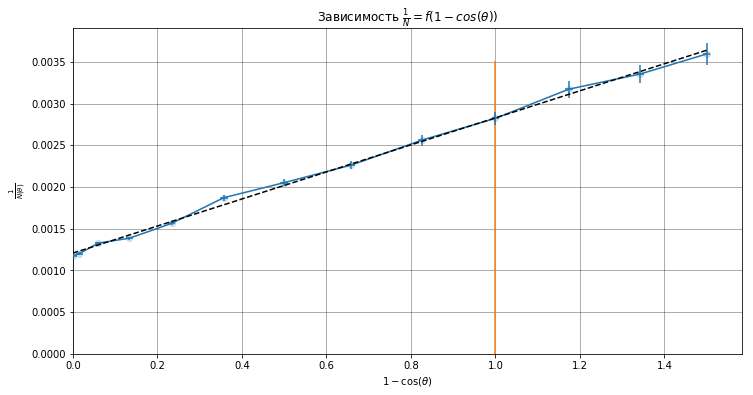

OLS (array([0.00162257, 0.00120827]), [2.1501451021331163e-05, 5.461698020113958e-05])
N_best_0 828±18  (2.2%)
N_best_90 353±18  (5.2%)
E (4.9±0.4)*10^5 eV (7.5%)


In [5]:
plt.figure(figsize=(12, 6))
ml.plt_pq(df1['x'], df1['y'])
plt.plot([1.0, 1.0], [0.0, 0.0035])
ols = ml.plot_OLS(df1['x'], df1['y'])
plt.xlabel(r'$1-\cos(\theta)$')
plt.ylabel(r'$\frac{1}{N(\theta)}$')
plt.xlim(0, None)
plt.ylim(0, None)
# plt.legend()
plt.title(r'Зависимость $\frac{1}{N} = f(1-cos(\theta))$')
plt.show()
print('OLS', ols)
best_line_coefs = ols[0][0], ols[0][1]
axis_intersect = ml.get_intersections_with_axes(*best_line_coefs)
with_x1_intersect = ml.get_intersection_of_lines_full(best_line_coefs[0], -1, best_line_coefs[1], 1, 0, -1)
N_best_0 = ml.PQ(1/axis_intersect[1], sigma=1/ols[1][1]*10**-3)
print('N_best_0', N_best_0)
N_best_90 = ml.PQ(1/with_x1_intersect[1], sigma=1/ols[1][1]*10**-3)
print('N_best_90', N_best_90)
E_gamma = 662*10**3*u.electronvolt
E = E_gamma*(N_best_90)/(N_best_0-N_best_90)
print('E', E)

In [6]:
df_print = df1.copy()
df_print.columns = [r'\theta', r'1-cos(\theta)', r'N', r'\frac{1}{N}']
table_to_print1 = ml.prepare_to_print(df_print)

ml.write_latex('table.tex', [table_to_print1], horizontal=False)
